In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data and visualization
data_train = pd.read_csv('training_data.csv', sep=',')
data_test = pd.read_csv('test_data.csv', sep=',')
data_train.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


As from our dataset we have VL-t0 and CD4-t0 as numerical column, now we can compute some descriptive statistics on them such as the covariance and correlation matrix which describe the variance and correlation between the two columns. 

In [3]:
#frame creation and covarriance between (VL and CD4)
data_new = data_train[['Resp','VL-t0', 'CD4-t0']]
frame = pd.DataFrame(data_new, columns=['VL-t0', 'CD4-t0'])
print ('covariance:',frame [ 'VL-t0' ].cov(frame ['CD4-t0']))
print (frame.cov())
print ('correlation:',frame [ 'VL-t0' ].corr(frame ['CD4-t0']))
print (frame.corr())

covariance: -58.1310910710711
            VL-t0        CD4-t0
VL-t0    0.496714    -58.131091
CD4-t0 -58.131091  39277.972929
correlation: -0.4161793739610807
           VL-t0    CD4-t0
VL-t0   1.000000 -0.416179
CD4-t0 -0.416179  1.000000


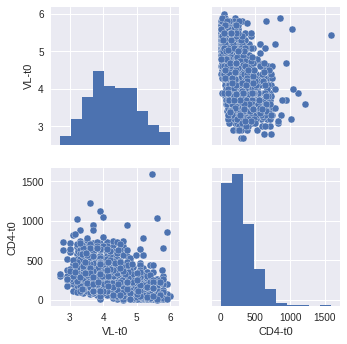

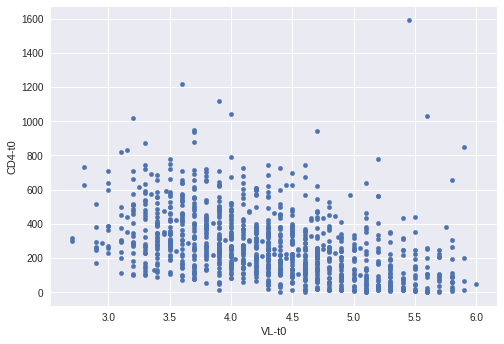

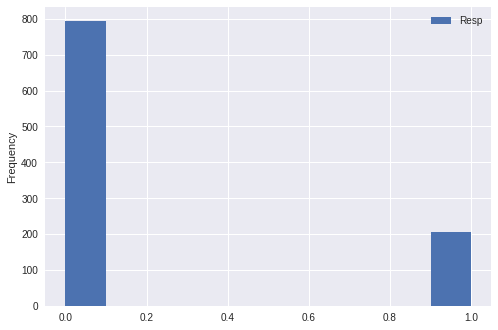

In [4]:
import seaborn as sns
sns.pairplot(data_new[['VL-t0', 'CD4-t0']])
data_new.plot.scatter(x= 'VL-t0', y= 'CD4-t0')
data_new[["Resp"]].plot.hist()
plt.show()

################# new dataset ########################

From the data exploration and previous histogram, we can realize our dataset is not balanced and we have to balance it by first remove all missing data and explore the two sequence columns that we have .

In [5]:
#loading the data
data = pd.read_csv('dataraning_new_data.csv', sep=',')
data.head()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
0,1,0,4.3,145,1005,104,51,67,2,71,2,0.402730,402,167,210,1,1,1,0.378134
1,2,0,3.6,224,909,110,49,65,73,0,0,0.383838,355,151,193,1,3,203,0.381375
2,3,0,3.2,1017,903,105,47,67,2,74,2,0.389078,360,146,181,1,7,201,0.368243
3,4,0,5.7,206,1455,105,49,71,1,71,0,0.405405,586,245,305,1,1,317,0.378527
4,5,0,3.5,572,903,105,50,69,73,0,0,0.400673,353,150,184,2,5,1,0.374439


In [6]:
featureSet = ["VL.t0","CD4.t0","rtlength", "pr_A", "pr_C","pr_G", 
              "pr_R", "pr_T","pr_Y", "PR_GC","RT_A", "RT_C","RT_G","RT_R", "RT_T", "RT_Y", "RT_GC"]
# featureSet = ["VL.t0":"RT_GC"]
X = data[featureSet]
y = data.Resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

y_train.shape

(736,)

let us balance the data 

In [8]:
sm = SMOTE(sampling_strategy = 'auto',kind = 'regular' )
X_r ,y_r = sm.fit_sample (data , data['Resp'])

In [9]:
Xc = X_r[:,2:]
yc = y_r
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

Logistic Regression

In [10]:
print('----------------- LogisticRegression--------------------')
logistic_model = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
logistic_predict = logistic_model.predict(Xc_test)
print(accuracy_score(yc_test, logistic_predict))
print(classification_report(yc_test, logistic_predict))

print('----------------- LogisticRegressionCV--------------------')

logistic_model = LogisticRegressionCV( random_state=0).fit(Xc_train, yc_train)
logistic_predict = logistic_model.predict(Xc_test)
print(accuracy_score(yc_test, logistic_predict))
print(classification_report(yc_test, logistic_predict))

print('----------------- LogisticRegression SGDClassifier--------------------')
logistic_model = linear_model.SGDClassifier( tol=1e-3).fit(Xc_train, yc_train)
logistic_predict = logistic_model.predict(Xc_test)
print(accuracy_score(yc_test, logistic_predict))
print(classification_report(yc_test, logistic_predict))


----------------- LogisticRegression--------------------
0.5986394557823129
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       139
           1       0.89      0.27      0.42       155

   micro avg       0.60      0.60      0.60       294
   macro avg       0.72      0.62      0.56       294
weighted avg       0.73      0.60      0.55       294

----------------- LogisticRegressionCV--------------------
0.7142857142857143
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       139
           1       0.77      0.66      0.71       155

   micro avg       0.71      0.71      0.71       294
   macro avg       0.72      0.72      0.71       294
weighted avg       0.72      0.71      0.71       294

----------------- LogisticRegression SGDClassifier--------------------
0.564625850340136
              precision    recall  f1-score   support

           0       0.87      0.09      0.17     

# Support Vector Machine

In [11]:

print('----------------- LinearSVC--------------------')
svm_model = LinearSVC(random_state=0, tol=1e-5).fit(Xc_train, yc_train)
svm_predict = svm_model.predict(Xc_test)
print(accuracy_score(yc_test, svm_predict))
print(classification_report(yc_test, svm_predict))
print('-----------------SVC--------------------')
svm_model = SVC(gamma='auto').fit(Xc_train, yc_train)
svm_predict = svm_model.predict(Xc_test)
print(accuracy_score(yc_test, svm_predict))
print(classification_report(yc_test, svm_predict))
print('-----------------perceptron--------------------')
model = Perceptron(tol=1e-3, random_state=0).fit(Xc_train, yc_train)
predict = model.predict(Xc_test)
print(accuracy_score(yc_test,predict))
print(classification_report(yc_test,predict))


----------------- LinearSVC--------------------
0.6564625850340136
              precision    recall  f1-score   support

           0       0.58      0.95      0.72       139
           1       0.90      0.39      0.55       155

   micro avg       0.66      0.66      0.66       294
   macro avg       0.74      0.67      0.64       294
weighted avg       0.75      0.66      0.63       294

-----------------SVC--------------------
0.6054421768707483
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       139
           1       1.00      0.25      0.40       155

   micro avg       0.61      0.61      0.61       294
   macro avg       0.77      0.63      0.55       294
weighted avg       0.78      0.61      0.55       294

-----------------perceptron--------------------
0.54421768707483
              precision    recall  f1-score   support

           0       0.86      0.04      0.08       139
           1       0.54      0.99      0.70  

In [12]:
print('-----------------RandomForestClassifier--------------------')
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model  = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0).fit(Xc_train, yc_train)
predict = model.predict(Xc_test)
print(accuracy_score(yc_test,predict))
print(classification_report(yc_test,predict))

-----------------RandomForestClassifier--------------------
0.7721088435374149
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       139
           1       0.79      0.78      0.78       155

   micro avg       0.77      0.77      0.77       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.77      0.77      0.77       294



# KNN Algorithm

KNN is a non-parametric where  non-parametric means there is no assumption for underlying data distribution. The model structure determined from the dataset wich is  very helpful in practice as most of the real world datasets do not follow mathematical theoretical assumptions. 

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. 

In [13]:
print('-----------------KNeighborsClassifier--------------------')
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(Xc_train, yc_train)
predict = neigh.predict(Xc_test)
print('accuracy:',accuracy_score(yc_test,predict))
print(classification_report(yc_test,predict))

-----------------KNeighborsClassifier--------------------
accuracy: 0.7346938775510204
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       139
           1       0.72      0.82      0.77       155

   micro avg       0.73      0.73      0.73       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.74      0.73      0.73       294

